## **`Assignment 1`**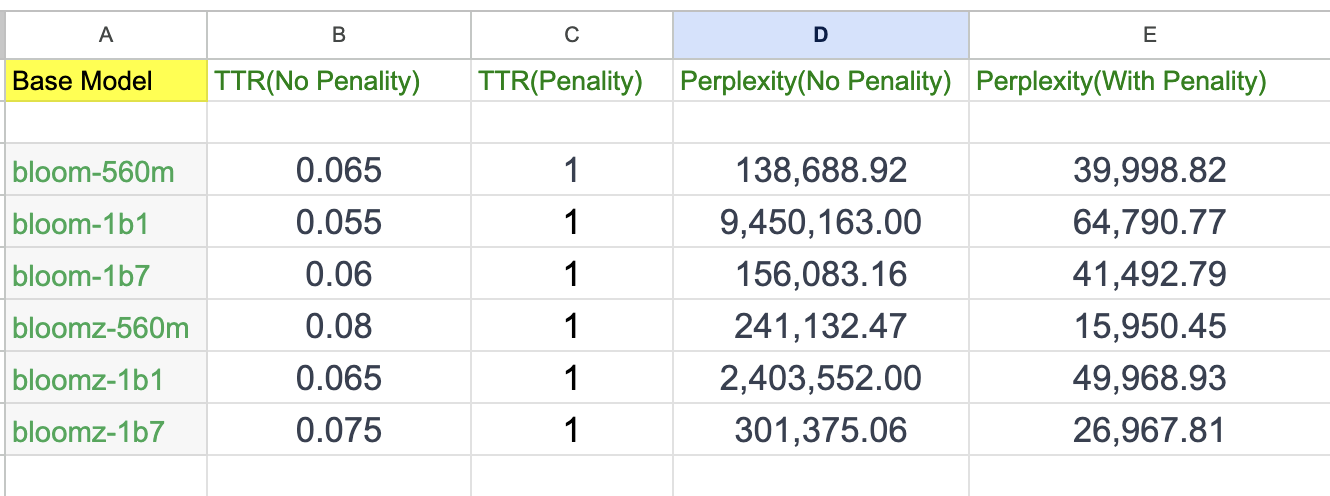

**`Q1. Bloom vs Bloomz`**

1. Bloom-Z models have been trained on even larger datasets compared to Bloom models. This means they've been exposed to more diverse language patterns and nuances where they store more information and understand better about language.
2. Bloom-Z models generate stories that make more sense. Their sentences flow together better, like a coherent book and fewer grammatical errors while Bloom models might sometimes jump around a bit.
3. Bloom-Z models use fancier words and have a bigger pool of words to choose from. So, the generated stories sound more varied compared to Bloom models, which might sound a bit simpler.
4. Bloom-Z models are typically larger in terms of model parameters and require more computational resources (like GPU memory and processing power) compared to Bloom models.



**`Q2. Generate a story of 200 words that starts with the words “Once upon
a time ” using each of these models.`**

`a)Process for both bloom and bloomz models: `


Started by importing all the required libraries -> Initialize the tokenizer and the model using pre-trained models from Hugging Face ->  Encode the prompt input "Once upon a time" by breaking it down into tokens using the initialized tokenizer of the model, which returns us a tensor using PyTorch -> The model then takes this tensor and generates text based on its pre-training vocabulary/corpora(The quality of the generated text can vary depending on the parameters used in the generate method) -> After the model generates the text for the input prompt, we use the same tokenizer to decode it -> Finally the generated text is Tokenized into readable form using the model tokenizer.


✅ Challenges:

1. Despite the minimum and maximum length specified as 200, the model generated shorter responses that is fewer than 200 words in some cases.

1. In several runs, especially without repetition penalties, the models tend to generate highly repetitive sequences where certain phrases or words are repeated excessively or make no sense.


✅ Variations:

1. Introducing repetition penalty did help mitigate the issue of repetitive sequences in the generated text across all models. But i found that the repetition_penality value higher than 1 didn't really impact on the diversity/randomness of the generated text. Eg: in bloom 1b7 and bloomz 1b7 models, The text generated with repetition penalty 2 is found same as the text generated with repetition penalty 1.5

2. I found that bloomz is generating different/diverse context text in differet runs while bloom models are giving the same text all over again with n runs.


**Parameters Explored:**

▶do_sample=True -> Enables sampling-based decoding, increasing diversity in generation.
 do_sample=False -> Model uses greedy decoding, it selects the token with the highest probability at each step.

▶num_return_sequences -> Controls the number of independent sequences generated.

  Greedy- > num_return_sequences = 1 -> Involves selecting the token with the highest probability at each step, resulting in a single output sequence.

  Beam ->num_return_sequences = n -> After decoding is complete, the algorithm returns the top num_return_sequences sequences from the final beam as the output.

▶temperature -> adjusts the level of randomness in the sampling process.
  
  ->Temperature parameter will have no effect when there is no sampling as token selection is deterministic.

  Lower temperatures (Closer to 0) for yielded conservative, high-quality outputs and higher temperatures did more diverse outputs.

▶repetition_penalty -> Is a parameter used to penalize the model from repeating the same token excessively within generated sequences.Applied during decoding.  Higher repetition_penalty value leads to less repetition in the generated text but may also result in less coherent outputs.









**`b) Compute the following two metrics: type-token ratio (TTR) and perplexity for your generated text outputs which help to quantitatively evaluate the generated texts, and discuss the results`**


⏬ Base Code->Base Model, Results and Description are attached in the next cell.



**Type-Token Ratio (TTR)** tells us how varied our vocabulary is. If the model generates a lot of different words, TTR is high, suggesting rich language usage and viceversa.

**Perplexity measures** how well a language model predicts the next word in a sequence. Lower perplexity means the model is better at predicting, while higher perplexity suggests it struggles more.

✅ Observation of Results: Table of Base Model and tuned model attached above.

Base Model: Params used->repetition_penalty

1. In the models where I have Introduced repetition_penalty, TTR was found to be 1.0 typically indicates that there's no repetition in the generated text, meaning each token is unique. However, while scanning the generated text, there were some repetition words but I found that their context is different or the case sensitive. For Eg: In the test generated by bloomz-1b7-with penalty-1.5, the token 'one ' is present as well as the tokens 'someone','anyone','One'. It means that permutations of words are considered differently.

*   Models with a repetition penalty consistently achieved a perfect TTR of 1.0,indicating maximum lexical diversity. Among the models without a penalty, bloomz-1b7 demonstrated relatively better lexical diversity with a TTR of 0.075.
*   In terms of perplexity, models with penalty found outperform those without penalty.


After Introducting -> Sampling, adjusting temperature,num_repeated_sequences=1(greedy):


*  bloom-1b7 , bloomz-560m consistently performed well in terms of TTR and perplexity, indicating its effectiveness in text generation tasks. Models like bloom-560m and bloomz-1b1 exhibit relatively lower TTR and higher perplexity, implying less diverse and less predictable text generation compared to the other models evaluated.



---

 **`c) Conduct a qualitative analysis of the text generations, highlighting any patterns or notable variations between Bloom and Bloom-Z outputs. Share
your observations on the creativity, coherence, and overall quality of the
generated stories.`**




**For Eg:** Among the models without penalty, bloom-560m has the lowest perplexity, followed by bloomz-560m and bloom-1b7.
Among these models with penalty, bloomz-560m and bloomz-1b7 have the lowest perplexity,



▶Bloom Models:


The generated stories are mostly found to be dark and deep. There are stories generated by bloom 1b7 that talk about death, breakup, monster etc., Shown creativity through conventional storytelling elements, often rooted in myth. Lots of repetition in context for smaller models and found better to have improved in larger models.


▶Bloomz Models:

 Found the generated stories more like everyday conversations, touching on modern, environmental and personal experiences. While mostly coherent, there are moments where the stories feel a bit disconnected. The stories here are of good quality and engaging.

Overall, I found the Bloom models has shown timeless wisdom, and the Bloom-Z model mostly shown its contemporary flair.



---


**`Q3. You experimented with two types of models of 3 different sizes.
Investigate the relationship between your results (type-token ratio and perplexity) and the size of these models. What trends do you notice? Analyze the correlation between model size and the computed metrics. Discuss the implications of these findings in terms of model scalability and performance `**

In [ ]:
 #pip install -q transformers


In [ ]:
#! pip show transformers

# **`Base Model`**

In [1]:
#Base Model of Bloom-560m, bloom-1b1, bloom-1b7, bloomz-560m, bloomz-1b1, bloomz-1b7

from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

#tokenizer1 = AutoTokenizer.from_pretrained("bigscience/bloom-560m")
#model1 = AutoModelForCausalLM.from_pretrained("bigscience/bloom-560m")

#tokenizer1 = AutoTokenizer.from_pretrained("bigscience/bloom-1b1")
#model1 = AutoModelForCausalLM.from_pretrained("bigscience/bloom-1b1")

#tokenizer1 = AutoTokenizer.from_pretrained("bigscience/bloom-1b7")
#model1 = AutoModelForCausalLM.from_pretrained("bigscience/bloom-1b7")

#tokenizer1 = AutoTokenizer.from_pretrained("bigscience/bloomz-560m")
#model1 = AutoModelForCausalLM.from_pretrained("bigscience/bloomz-560m")

#tokenizer1 = AutoTokenizer.from_pretrained("bigscience/bloomz-1b1")
#model1 = AutoModelForCausalLM.from_pretrained("bigscience/bloomz-1b1")

tokenizer1 = AutoTokenizer.from_pretrained("bigscience/bloomz-1b7")
model1 = AutoModelForCausalLM.from_pretrained("bigscience/bloomz-1b7")

inputs1 = tokenizer1.encode("Once upon a time ", return_tensors="pt")
outputs1 = model1.generate(inputs1,min_length = 200, max_length=200, repetition_penalty=1.5)
generated_text = tokenizer1.decode(outputs1[0])
print("bloom-1b7:" + str(generated_text))
tokens = tokenizer1.tokenize(generated_text)
ttr = len(set(tokens)) / len(tokens)
ttr

input_ids = tokenizer1.encode(generated_text, return_tensors="pt")
logits = model1(input_ids).logits


loss = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), input_ids.view(-1))

perplexity = torch.exp(loss)

print("Type-Token Ratio (TTR):", ttr)
print("Perplexity:", perplexity.item())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


bloom-1b7:Once upon a time  there was an old man who lived in the woods. He had two sons, one of whom died when he got too big to walk and another that grew up into him as his son-in-law.  The older boy wanted nothing more than for himself but didn't want anyone else's attention so decided not even bothering with school or work until after he'd grown out enough.   His father told this story about how they were both very young at first because their parents never let them have any other children before having just married.    They would always be together forever...until death do us part! One day while walking through some brushy woodland on foot,  I saw something unusual: A large black bear cub standing alone by itself near where my feet touched it!  It looked like someone from yesterday - yet somehow seemed far away now....I wondered what happened? Wasn't she still alive?  So much longer then I'd thought!! She must've been dead long ago ...but her body wasn't found anywhere nearby
Typ

**Run 1: bloom-560m:(Without Penalty)**

Once upon a time  I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the world
And I was a man of the
Type-Token Ratio (TTR): 0.065
Perplexity: 138688.921875

**Run 2:bloom-560m(with repetition_penalty-2.0):**

 Once upon a time  I was in the midst of my
life, and it seemed as if all that had happened to me were just an act.
I could not help thinking how much more wonderful things might happen,
when we should be able at once. It would seem so easy for us both; but what is this?
It seems like nothing.

"There are many reasons why you must have been born with such powers.  You may well say your father gave them up when he died--but there can only come one reason: they will never cease until after death has passed away from our side! We cannot live without them; yet even then their power shall remain unshaken by any change which takes place within ourselves or between themselves!  They do indeed continue whatever changes take effect on those who know about it; nor does anything else affect these beings except through some influence brought into existence during life itself!

"I am sure no man ever knows whether his own mind remains free before him because its thoughts become conscious
Type-Token Ratio (TTR): 1.0
Perplexity: 39998.82421875

Type-Token Ratio (TTR): 0.065
Perplexity: 2403552.0

==================================================

**Run 1: bloom-1b1: Without Penalty**

Once upon a time  I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a young man
I was a
Type-Token Ratio (TTR): 0.055
Perplexity: 9450163.0

**Run 2:bloom-1b1(with repetition penalty-2.0)**

Once upon a time  I was in the army.
I had to fight for my country, and it wasn't easy.  But now I'm back home,
and I've got some money that can help me out of this hole where we are
now.

"I'm glad you came along with us. It's nice having someone who knows what he is doing! And it's good you're here because if there were no one like yourself I'd be stuck at work all day long trying not only survive but thrive on life itself!
But that's just how things have been going so far since we've met!  We haven't seen each other much lately; we're both busy working our way through college classes or whatever else has happened over these past few years...but we'll see about getting together again soon!

"I hope you'll come by sometime when you've finished your studies--maybe even before then--and I'll show up as often whenever possible while there's still room left open between two trips into town...

"And don't forget: If anything happens during those visits we'd love
Type-Token Ratio (TTR): 1.0
Perplexity: 64790.7734375

==================================================

**Run 1: bloom-1b7: Without penalty**

Once upon a time  I was a little girl
And I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was a little girl
I was
Type-Token Ratio (TTR): 0.06
Perplexity: 156083.15625

**Run 2:bloom-1b7:(with repetition penalty-2.0)**

Once upon a time  I was in love with you
I thought that we could be happy forever.
But now, it's over and gone...
And I'm not sure what to do anymore!
I'm sorry for everything I've done,
but this is the end of me... my life as well."

The man who had been so close at hand suddenly disappeared from sight.

"I don't know how long I'll have left here before they find out about it! " he cried desperately.  "I can't even tell them where we're going or why we've come back there!  It's too much trouble already...  And if anyone finds us they'll kill both our families!!   But please help me: Please let someone else take care o'me instead!!
Please give up your dream: Let go all those feelings you've got inside yourself; just leave behind these memories alone - because they're no good any more.. !
It's only when you're dead will you'll understand what's really important :)
Don't worry,  we'll get through it: We'll survive together again !

Type-Token Ratio (TTR): 1.0
Perplexity: 41492.79296875

**Run 2:bloom-1b7:(with repetition penalty-1.4)**

Once upon a time  I was in love with you
I thought that we could be happy forever.
But now, it's over and gone...
And I'm not sure what to do anymore!
I'm sorry for everything I've done,
but this is the end of me... my life as well."

The man who had been so close at hand suddenly disappeared from sight.

"I don't know how long I'll have left here before they find out about it! " he cried desperately.  "I can't even tell them where we're going or why we've come back there!  It's too much trouble already...  And if anyone finds us they'll kill both our families!!   But please help me: Please let someone else take care o'me instead!!
Please give up your dream: Let go all those feelings you've got inside yourself; just leave behind these memories alone - because they're no good any more.. !
It's only when you're dead will you'll understand what's really important :)
Don't worry,  we'll get through it: We'll survive together again !

Type-Token Ratio (TTR): 1.0
Perplexity: 41492.79296875

==================================================

**Run 1: bloomz-560m: Without Penalty**

Once upon a time  when the world was in a state of peace, the world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a state of peace. The world was in a
Type-Token Ratio (TTR): 0.08
Perplexity: 241132.46875

**Run 2:(with repetition_penalty):**

Once upon a time  when the world was in its infancy, there were many people who had no idea what they would be doing. They did not know how to cook or dress for dinner and even if you knew it all about cooking food that day your family might never eat anything from them again until later on... but this is true of most children . Children are always learning new things every year , so it's important we keep our kids entertained as much ... like any other child .
Children learn by watching movies with their parents while playing games at home during school hours - which can make life easier than ever before ! But don't forget fun activities too! If you're having trouble finding something interesting outside playtime then try some video game nights outdoors where everyone has access (or use) computers instead. . Kids love music; especially rock bands such as: The Beatles & Rolling Stones have been popular since childhood because they're easy listening tunes without being distracted.  You could also listen upbeat songs like: pop
Type-Token Ratio (TTR): 1.0
Perplexity: 15950.44921875

==================================================

**Run 1:bloomz-1b1:Without penalty**

Once upon a time  I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of the University of Oklahoma. I was a student of
Type-Token Ratio (TTR): 0.065
Perplexity: 2403552.0

**Run 2: bloomz-1b1 with penalty:**

Once upon a time  I was in the middle of an argument with my wife. She had been arguing for hours about whether or not to have her baby, and she wanted me back home so that we could talk it over together.  We were both very tired from our long day at work but decided on going out after dinner because there would be no one else around except us two.   After walking downstairs into their living room they started talking again as if nothing happened.
I asked them why this conversation continued when he said something like "I've got some news you should know" (which is what most people say before someone says anything). They answered "I don't want any more information until you've told your husband everything! You can tell him now - it's too late anyway...and then he'll never get used up by all these questions....so let's just go away tonight ...if you're still interested I'll let myself off later today..but I'm sure you'll understand soon enough!!!!! If you'd rather stay here we'll discuss
Type-Token Ratio (TTR): 1.0
Perplexity: 49968.9296875

==================================================

**Run 1:bloomz-1b7 - Without penalty:**

bloomz-1b7:Once upon a time  there was a man named John  who was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John was a farmer  and a farmer's son  John
Type-Token Ratio (TTR): 0.075
Perplexity: 301375.0625


**Run 2:bloomz-1b7: with Penalty(2.0):**

Once upon a time  there was an old man who lived in the woods. He had two sons, one of whom died when he got too big to walk and another that grew up into him as his son-in-law.  The older boy wanted nothing more than for himself but didn't want anyone else's attention so decided not even bothering with school or work until after he'd grown out enough.   His father told this story about how they were both very young at first because their parents never let them have any other children before having just married.    They would always be together forever...until death do us part! One day while walking through some brushy woodland on foot,  I saw something unusual: A large black bear cub standing alone by itself near where my feet touched it!  It looked like someone from yesterday - yet somehow seemed far away now....I wondered what happened? Wasn't she still alive?  So much longer then I'd thought!! She must've been dead long ago ...but her body wasn't found anywhere nearby
Type-Token Ratio (TTR): 1.0
Perplexity: 26967.810546875

**Run 2:bloomz-1b7: with Penalty(1.5):**

Once upon a time  there was an old man who lived in the woods. He had two sons, one of whom died when he got too big to walk and another that grew up into him as his son-in-law.  The older boy wanted nothing more than for himself but didn't want anyone else's attention so decided not even bothering with school or work until after he'd grown out enough.   His father told this story about how they were both very young at first because their parents never let them have any other children before having just married.    They would always be together forever...until death do us part! One day while walking through some brushy woodland on foot,  I saw something unusual: A large black bear cub standing alone by itself near where my feet touched it!  It looked like someone from yesterday - yet somehow seemed far away now....I wondered what happened? Wasn't she still alive?  So much longer then I'd thought!! She must've been dead long ago ...but her body wasn't found anywhere nearby
Type-Token Ratio (TTR): 1.0
Perplexity: 26967.810546875


# **Tuning Parameters:**

temperature, do_sample

In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import gc

# Clearing memory
gc.collect()
torch.cuda.empty_cache()

# List of model names to iterate over
'''model_names = [
    "bigscience/bloom-560m",
    "bigscience/bloom-1b1",
    "bigscience/bloom-1b7",
    "bigscience/bloomz-560m",
    "bigscience/bloomz-1b1",
    "bigscience/bloomz-1b7",
]'''
model_names = [
    "bigscience/bloom-1b7"
]

def generate_text(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name).cuda()  # Moving the model to GPU

    prompt = "Once upon a time"
    inputs = tokenizer.encode(prompt, return_tensors="pt").cuda()

    outputs = model.generate(inputs, min_length=200, max_length=200, do_sample=True)
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    tokens = tokenizer.tokenize(generated_text)
    ttr = len(set(tokens)) / len(tokens)

    input_ids = tokenizer.encode(generated_text, return_tensors="pt").cuda()
    logits = model(input_ids).logits
    loss = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), input_ids.view(-1))
    perplexity = torch.exp(loss)

    # Converting perplexity to base 10 scale for simplicity
    perplexity_base10 = torch.log10(perplexity)

    return model_name, generated_text, ttr, perplexity_base10.item()

for model_name in model_names:
    print(f"Model: {model_name}")
    model_name, generated_text, ttr, perplexity_base10 = generate_text(model_name)
    print("Generated Text:", generated_text)
    print("Type-Token Ratio (TTR):", ttr)
    print("Perplexity (Base 10):", perplexity_base10)
    print("="*50)


Model: bigscience/bloom-1b7


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Generated Text: Once upon a time, a king owned a vast farm, named Kunjunj and surrounded by a vast swamp. In his palace, the king had a queen who is the daughter of a tiger. So, the king was very upset because he didn't have the time to raise a lion to fight for her. So, one day in his palace, the king asked to the queen about raising some lions. Because of the fear that the king might lose her crown, he thought he should give up raising lions and only let one reign as long as she's here. So, in the morning, his queen brought a bunch of cakes to be brought home. In the middle of the cakes was a red cakes, so the king gave this cakes to the king's wife named Sita as a surprise to show her her favourite cakes. The king sent Sita a messenger as that is a royal messenger. The messenger said the king had planned to kill her first, but the king told him
Type-Token Ratio (TTR): 0.485
Perplexity (Base 10): 4.461356163024902


**Run 1: bloom-560m:(Has num_return_sequnces=1 and temperature is 0.7)**

 Generated Text: Once upon a time, as the world
wept for the lost, a voice came from the midst of the storm. The
voice of the Lord, the voice of the Lord’s servant, the voice of the
Lord’s God, the voice of the Lord’s righteousness. The Lord appeared to
the prophet, and he cried out, “Who is the Lord of this nation?” But
the prophet answered him, “Who is the Lord of Israel?” And he said,
“Who is the Lord of the world?” And he answered him, “Who is the Lord
of the earth?” And he said, “Who is the Lord of all things?” And he
said, “Who is the Lord of all things that are in heaven?” And he said,
“Who is the Lord of the world?” And he said, “Who is the Lord of
the earth?” And he said, “Who is the Lord of all
Type-Token Ratio (TTR): 0.305
Perplexity (Base 10): 5.094868183135986


**Run 2: bloom-560m:(No num_return_sequnces=1 and temperature is 0.4)**
Generated Text: Once upon a time, the world was a place of peace and harmony, and the world was a place where people had a place to live. But now, the world is a place of war and conflict. The world is a place of misery and suffering. The world is a place of destruction and destruction. The world is a place of death and death. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering and suffering. The world is a place of suffering
Type-Token Ratio (TTR): 0.15
Perplexity (Base 10): 4.928491592407227


==================================================

**Run 1: bigscience/bloom-1b1**

Generated Text: Once upon a time, some of the most powerful and influential people in the world and in the lives of men and women were born in a certain town, a particular family and a certain year. They were called “celebrities”. They were known to be extremely gifted, rich and influential people who, in a way, were a source of inspiration and a source of pride for their peers.
I believe that one of the most important things that can be done to understand the culture and influence of a particular person is to understand the influence of his/her family. And, as I mentioned, the influence of his/her family was a very important factor in the lives of their children and their children’s lives. Every generation has its own family. The influence of their family is very important in determining the culture of a particular generation.
The influence of their parents on the choices of their children is very important. They are responsible for the decisions that their children make in their lives. They are responsible for
Type-Token Ratio (TTR): 0.44
Perplexity (Base 10): 4.926474094390869

 **Run 2: No return sequences and temperature = 0.7**

Generated Text: Once upon a time I was a soldier.
- Really?
- Yeah.
Were you a soldier before, did you know anything about it?
I didn't know how to fight until... when you came across me, my friend did you know that you're the only one left?
I went around saying that the only one left fighting was me.
What are you talking about?
You didn't know about combat, did you not?
The soldier of another time, was he there?
The soldier of another time, was he here?
You don't give a shit about it?
You don't care.
Look, I want to find out how many people fought in this war.
How many of them?
How many were there for us?
Who?
How many of those soldiers.
All of you, you.
I had the good fortune to find out.
I don't believe you.
I believe you, I think I'm lying.
There's something I wanna tell you.
Now, we thought we'd tell you how it happened.
We thought
Type-Token Ratio (TTR): 0.485
Perplexity (Base 10): 5.269371509552002

==================================================

**Model: bigscience/bloom-1b7**
Generated Text: Once upon a time, there was a beautiful young lady who loved to be with her friends, and she was very much loved by her family, but she had a dark past that would forever change her life. She would be the first to admit that she was a monster who would devour the lives of anyone who stood in her way. The world would have to be changed forever to stop her, but that would only become possible if everyone knew and understood her true nature.
Her name was Lucy, and she was a beautiful young girl who had just graduated from college and was planning on starting her career in the medical field. She was still a bit of a wild child, and she was determined that she would be the one to get in the way of everyone else's happiness. It was only a matter of time before she found herself on the path to ruin and death. The only thing that could stop her was love and a true friendship.
But how could she go against her own convictions? The
Type-Token Ratio (TTR): 0.52
Perplexity (Base 10): 4.5832319259643555

==================================================

**Model:bloomz-560m**
Generated Text: Once upon a time of drought in the last half of the last century, the government began to put water in the reservoirs, and they were not only drained, but also filled with water. Water was pumped into the reservoirs without any human intervention. During droughts, the reservoirs were filled with water, but this was not always the case. This is called a reservoir failure. The reservoirs may also fail to meet the demands of the current drought. The reservoir failure may occur because of a fault in the reservoir itself. The reservoirs may also fail to meet the future needs of the reservoir under the same conditions. Such reservoir failure should be investigated. The reservoir failure should be investigated and evaluated by the authority. The authority should undertake the following actions: a. Determine whether a reservoir failure is a fault. b. Take action to prevent the reservoir failure from occurring. c. Determine if the reservoir failure will occur again. d. Determine if there is a chance of a recurrence
Type-Token Ratio (TTR): 0.445
Perplexity (Base 10): 4.351202964782715

==================================================

**Model: bloomz-1b1 ((temperature - 0.7, do_sample_true, no_return_sequences=1)**

Generated Text: Once upon a time, I was a fan of the classic game of football, the Champions League. I think the reason I was so fond of it was because it was a sport that I played every day and I enjoyed watching it. I wanted to have more experience for the competition and have a better chance of winning. I wasn't sure what I was going to achieve, but I did my best to achieve the best possible results. I felt proud and happy when I won. At the time, I didn't think it was a good idea to be competitive, but now I realize that the best people around me did. I feel happy to be playing football every day. I think that has helped me to be more competitive. I feel like I have learned a lot from the competition. I have learned how to take the best out of myself and improve my game. I feel like I have learned a lot about the game and how to improve it. Since then, I play all the time. I think
Type-Token Ratio (TTR): 0.425
Perplexity (Base 10): 4.916407585144043

==================================================

**Model: bloomz-1b7(temperature - 0.7, do_sample_true, no_return_sequences=1)**

Generated Text: Once upon a time, a baby was born into the world. He was a girl. She was a baby girl. She was born into a family. Family was a complex of people, animals and things. Family was not just a bunch of people. Family was not just a bunch of things. Family was a complex of all of these. Family was the only thing that could be perfect. No one could be perfect. No one. Family was the only thing that could be perfect. No one could be perfect. No one could be perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was perfect. Family was
Type-Token Ratio (TTR): 0.18
Perplexity (Base 10): 4.849380970001221

**Model:bloomz-1b7**

Generated Text: Once upon a time, I was a young man with a dream of becoming a professional tennis player. I dreamt of playing tennis at all costs. It was a dream that could not be fulfilled. Now that I am older and married, I realize that the dream I had was foolish. I have a wife and a family that I love dearly. I do not plan to let anything in my life that will interfere with this. I have decided to focus my time and energy on the things that matter for me." - Bill Yates, tennis player and husband to Sarah Bechdel Bill Yates has been married for almost 30 years and has two adult children. "Sarah Bechdel has been a huge part of my life for so long that it is hard to imagine my life without her. Her presence and love in my life has been immense. Her support has been a constant source of comfort and stability during our lifetime together." - Bill Yates, tennis player and husband to
Type-Token Ratio (TTR): 0.52
Perplexity (Base 10): 4.781262397766113


**Model: bloomz-1b7(temperature - 0.7, do_sample_true)**

Generated Text: Once upon a time, the sun was not set in the same place on the earth. The sun was not set on the same spot every day. It moved around the earth slowly and gradually. It was a slow moving planet. The sun was not set on the same spot every day. It moved around the earth slowly and gradually. It was a slow moving planet. The sun was not set on the same spot every day. It moved around the earth slowly and gradually. It was a slow moving planet. The sun was not set on the same spot every day. It moved around the earth slowly and gradually. It was a slow moving planet. The sun was not set on the same spot every day. It moved around the earth slowly and gradually. It was a slow moving planet. The sun was not set on the same spot every day. It moved around the earth slowly and gradually. It was a slow moving planet. The sun was not set on the same spot every day. It moved
Type-Token Ratio (TTR): 0.145
Perplexity (Base 10): 5.724112033843994


**Model: bloomz-1b7(temperature - 0.4, do_sample_true)**


Generated Text: Once upon a time, a group of people gathered together to celebrate a holiday. The holiday was a celebration of the life of a man who had been a very important person in the community. The holiday was celebrated by the community. The community celebrated the holiday by gathering together. The holiday was celebrated by the community. The community celebrated the holiday by gathering together. The holiday was celebrated by the community. The community celebrated the holiday by gathering together. The holiday was celebrated by the community. The community celebrated the holiday by gathering together. The holiday was celebrated by the community. The community celebrated the holiday by gathering together. The holiday was celebrated by the community. The community celebrated the holiday by gathering together. The community celebrated the holiday by gathering together. The community celebrated the holiday by gathering together. The community celebrated the holiday by gathering together. The community celebrated the holiday by gathering together. The community celebrated the holiday by gathering together. The community celebrated the holiday by gathering together. The community celebrated the holiday by
Type-Token Ratio (TTR): 0.155
Perplexity (Base 10): 5.419250011444092


==================================================

**`Run 1:bloomz-560m`** WITHOUT MIN LENGTH

Generated Text: Once upon a time of peace, there will be a change in the nature of the military service in the country. The army will be more focused on defending itself and improving its status as a force of peace. The service will also be more likely to be conducted on the basis of merit, rather than military rank and allegiance.
Type-Token Ratio (TTR): 0.6363636363636364
Perplexity: 10447.7783203125

**`Run 2 : :bloomz-560m: With Min Length`**

Generated Text: Once upon a time, your browser will be automatically refreshed. This will be performed by either browser or... More info
 browser in your browser, or the network router. The refresh will usually take a few seconds. Click on "Continue" to proceed. This will refresh your browser's settings. Your browser will be redrawn. All the content you have... More info
revised. This will enable the browser to automatically refresh when it is ready. Click again on "Continue" to proceed. This will refresh your browser's settings. Your browser will be redrawn... More info
revised. This will enable the browser to automatically refresh when it is ready. Click again on "Continue" to proceed. This will refresh your browser's settings. Your browser... More info
revised. This will enable the browser to automatically refresh when it is ready. Click again on "Continue" to proceed. This will refresh your browser's settings. Your browser... More info

Type-Token Ratio (TTR): 0.275
Perplexity: 357746.375

**` Run 3 bloomz-560m: `**
Generated Text: Once upon a time of drought, the birds were eating a large amount of fresh food. When the food was eaten, the birds would be fed again and get more energy. Although the bird did not eat food during the drought, they would be fed again when the food was dry. Once the food was fed again, the bird will gain more energy. This will be a good example of a drought response. The bird then goes back to eating the food it was fed again, which will be more nutritious and ready for the next time. For example, the bird would eat a chicken a day. This time, the bird will eat a chicken, not a turkey. The bird will not do this until the food is dry. The bird then goes back to eating a chicken, not a turkey. The bird will eat the chicken again and will increase the food in the bird's diet. This will be a good example of a drought response. If the bird continues to feed the food
Type-Token Ratio (TTR): 0.355
Perplexity: 24852.84375

**` Run 4 bloomz-560m: `**
Generated Text: Once upon a time when the earth was so hot it was impossible to move, even during the day, on the earth. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. The earth was made insensible to the heat. the earth was made insensible to the heat. the earth was made insensible to the heat. the earth was made insensible to the heat. the earth was made ins
Type-Token Ratio (TTR): 0.125
Perplexity: 1308623.0

**` Run 1 bloomz-1b1m: `**

Generated Text: Once upon a time there was a man called the Sphinx, who was an enormous stone who was in the midst of a sea of men, and the men were at war with each other and with the Sphinx. They began to fight, and the Sphinx was defeated. The men stopped fighting and the Sphinx began to talk. He said to the men, “You all will die in this fight.” He then began to talk to the Sphinx about the future. At one time a man named the Babe said, “You will die in this fight.” The Sphinx answered, “You will die in this fight.” The Babe said, “You will die in this fight.” He said to the Sphinx, “You will die in this fight.” The Sphinx said to the Babe, “You will die in this fight.” He said to the Babe, “You will die in this fight.” He said to the B
Type-Token Ratio (TTR): 0.28
Perplexity: 2046491.0

**` Run 2 bloomz-1b1m: `**

Generated Text: Once upon a time, in the days of the late 19th century, the local barbershop was the only place in the town that could do the job of hairdressing to women. But as the time passed, the barbershop has gone down to the basement of the local school and now there is no place for women to get hair done. Since then, women have had to use a hairdresser at the local hospital, the local school and the local barbershop. Women in the local area have said they do n't want to continue having hair done at the local barbershop because the staff there is not well trained. The women in the area have said they would like to see more training for the hairdresser. They also do n't want to have their hair done at the local barbershop because the staff there is not well trained. At first, the women in the area were concerned about what to do with their hair. However, after a few
Type-Token Ratio (TTR): 0.445
Perplexity: 68038.6015625

**` Run 1 bloomz-1b7: `**
Generated Text: Once upon a time, I used to sit down and write a blog or two about this subject. It was a subject I felt passionate about. But now, many things have changed. My passion has declined. I am now just writing about what has happened to me. That is a very sad fact. It is sad, but true. It is hard. I guess it’s time for me to let go of my passion and focus on other things. But, I also realize that I was excited about the things that I wrote about in the past. It was fun to write and to share. It was a joy to come across these stories, and I would like to continue to write about them. I write about them here. I would like to keep a log of this, and I would appreciate your feedback on this. I did not really do the same thing with the blog. I am now writing here to let you know that I am no longer passionate about it. I am not
Type-Token Ratio (TTR): 0.47
Perplexity: 29629.759765625

**` Run 2 bloomz-1b7: `**

Generated Text: Once upon a time, there was a man named Tom. He was a well-mannered man. However, his life turned out to be very different from what he had... read more... - P.S. Sorry for the late reply. I was just out of the country. I have been enjoying the travel. - Yours sincerely, Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I. Yoko Ono Ono F.B.I
Type-Token Ratio (TTR): 0.285
Perplexity: 168862.40625


# **`Adjusting Nucleus sampling`**

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

tokenizer4 = AutoTokenizer.from_pretrained("bigscience/bloomz-1b7")
model4 = AutoModelForCausalLM.from_pretrained("bigscience/bloomz-1b7")

inputs4 = tokenizer4.encode("Once upon a time ", return_tensors="pt")

nucleus_sampling = {
    "do_sample": True,
    "max_length": 200,
    "min_length": 200,
    "temperature": 0.7,
    "top_p": 0.92,
    "top_k": 50,
    "repetition_penalty": 1.2,
    "num_return_sequences": 2
}

outputs4 = model4.generate(inputs4, **nucleus_sampling)
generated_text = tokenizer4.decode(outputs4[0], skip_special_tokens=True)

tokens = tokenizer4.tokenize(generated_text)
ttr = len(set(tokens)) / len(tokens)
ttr

with torch.no_grad():
    input_ids = tokenizer4.encode(generated_text, return_tensors="pt")
    logits = model4(input_ids).logits
    loss = torch.nn.functional.cross_entropy(logits.view(-1, logits.size(-1)), input_ids.view(-1))
    perplexity = torch.log10(torch.exp(loss))

print("Generated Text: ", generated_text)
print("Type-Token Ratio (TTR):", ttr)
print("Perplexity:", perplexity.item())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Generated Text:  Once upon a time  I was very sick, and it wasn't until the morning that i felt better. All my friends are in their bed with pneumonia or something like this all week long so no one is talking to me about how sadly they have lost someone close by who died of cancer... So when you get back from hospital it's pretty much over for most days but only half the weeks before your next round! How lucky we were at having such an amazing team here on ward B because everyone worked really hard together - especially our nurses which kept us sane during these dark times. The staff there made sure everything went smoothly while dealing with patients & treating them just as if they'd been family members. Thankfully nothing too serious happened since then although now i'm glad not being able to go out anymore after work (which works great) makes me feel safer inside rather than outside even though I'm still looking forward each day seeing new people!! Good job NHS Staff!!! 👏🥰😍�
Type-To

In [ ]:
bloomz-1b7:
Generated Text:  Once upon a time  a man was in love with a woman and he had to tell her the truth about himself. He was going to tell her the truth about himself, but he didn't want to tell her that he was in love with her, he just wanted to tell her he loved her. So he told her the truth about himself. She was in love with him, but she didn't know it. She loved him, but she didn't know it. He was in love with her, and she didn't know it. She loved him. She was in love with him. She didn't know it. He was in love with her, and she didn't know it. She loved him. She was in love with him. She didn't know it. He was in love with her. She didn't know it. He was in love with her. She didn't know it. He was in love with her. She didn't know it. He was in love with her. She didn't know it. He was
Type-Token Ratio (TTR): 0.195
Perplexity: 4.936464309692383





# **`Assignment Answers`**




1. One common challenge across all models is the tendency for repetition in generated text. In several runs, the model repeated phrases or sentences multiple times, showing lack of diversity and creativity in generating text.

2.Some generated texts lacked coherence and continuity. They jumped between topics abruptly, some failed to follow a logical narration.

3.Impact of Repetition Penalty:

Introducing a repetition penalty varying between with 1.1 and 2.0 -helped alleviate the issue of repetitive text to some extent. Models with repetition_penalty 1.0 is found same as no penalty and higher penalty of 2.0 generated variation in text but found less coherent.

4. The quality of generated text varied significantly between runs and models. Some outputs appeared more natural and grammatically correct, while others contained grammatical errors or nonsensical phrases

For Instance:

In bloom-560m: Some runs, in the base model particularly those with repetition penalty, the text generated using the bloom-560m model exhibited relatively natural language patterns and grammatical correctness. For example, in Run 2 attached above, the generated text starts with "Once upon a time" and proceeds to create a coherent narrative about life and relationships.




🟤 **(b) Compute the following two metrics -- type-token ratio (TTR) and perplexity
for your generated text outputs which help to quantitatively evaluate the
generated texts, and discuss the results.**
:

Higher TTR - Diverse and varied text, a broader vocabulary usage.

Lower TTR - Repetitive text patterns and limited lexical diversity.

Higher perplexity - Greater uncertainty and difficulty in predicting the next word.

Lower perplexity - Performed better in predicting the next word in the sequence. Indicated better fluency and coherence in the generated text.



